In [288]:
import pandas as pd

bikes=pd.read_csv('datasets/SeoulBikeData.csv',encoding='latin1')

In [289]:
bikes.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [290]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [291]:
bikes["Seasons"].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [292]:
bikes.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [293]:
bikes['Date']=pd.to_datetime(bikes['Date'])

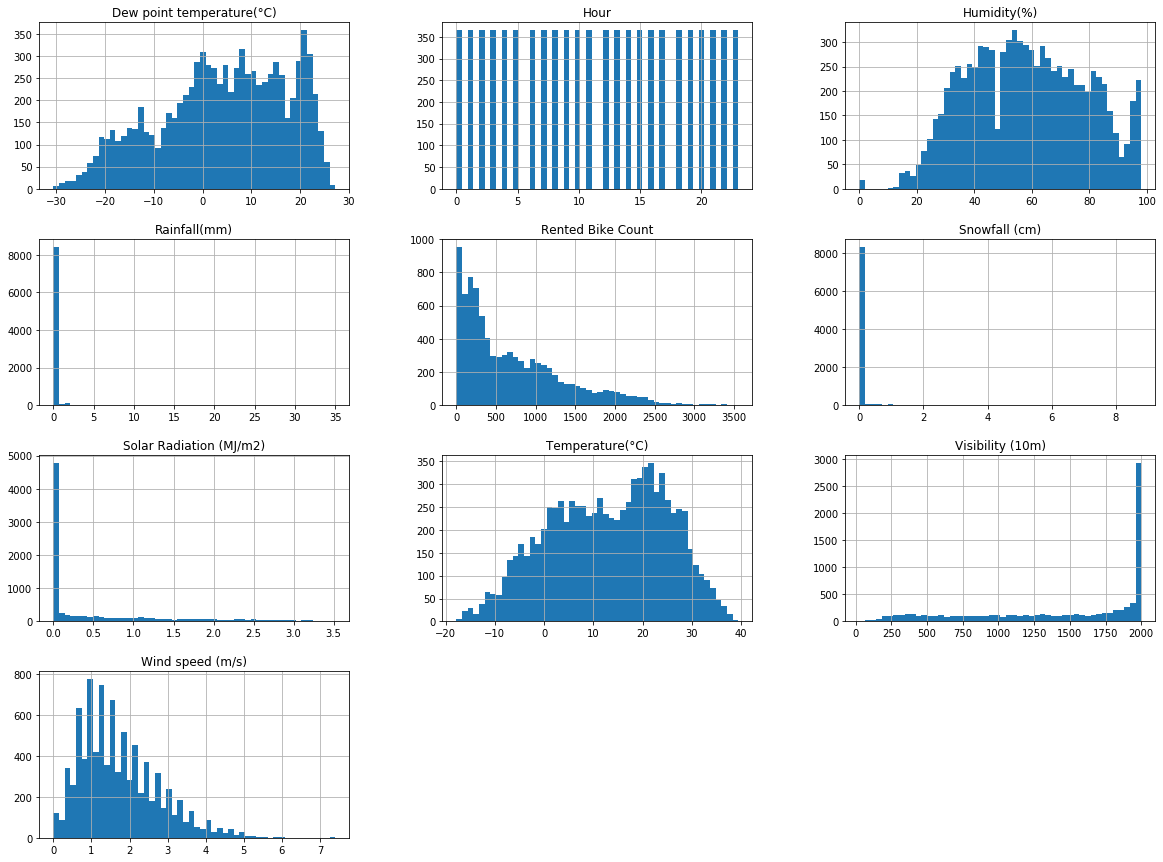

In [294]:
%matplotlib inline
import matplotlib.pyplot as plt
bikes.hist(bins=50, figsize=(20,15))
plt.show()

In [295]:
# to make this notebook's output identical at every run
import numpy as np
np.random.seed(42)

# Prepare the data for Machine Learning algorithms

There's one thing that's peculiar. There are 13 dates which are classified as a Non-Functioning Day. We should remove those dates since the bike count is zero not because of lack of demand, but because the rentals are closed.

In [296]:
bikes[bikes['Functioning Day']=='No']['Date'].unique()

array(['2018-11-04T00:00:00.000000000', '2018-10-05T00:00:00.000000000',
       '2018-09-18T00:00:00.000000000', '2018-09-19T00:00:00.000000000',
       '2018-09-28T00:00:00.000000000', '2018-09-30T00:00:00.000000000',
       '2018-02-10T00:00:00.000000000', '2018-04-10T00:00:00.000000000',
       '2018-06-10T00:00:00.000000000', '2018-09-10T00:00:00.000000000',
       '2018-03-11T00:00:00.000000000', '2018-06-11T00:00:00.000000000',
       '2018-09-11T00:00:00.000000000'], dtype='datetime64[ns]')

In [297]:
bikes[bikes['Functioning Day']=='No']['Rented Bike Count'].sum()

0

In [298]:
bikes=bikes[~(bikes['Functioning Day'] == 'No')]
bikes=bikes.drop("Functioning Day",axis=1)

In [299]:
bikes.dtypes

Date                         datetime64[ns]
Rented Bike Count                     int64
Hour                                  int64
Temperature(°C)                     float64
Humidity(%)                           int64
Wind speed (m/s)                    float64
Visibility (10m)                      int64
Dew point temperature(°C)           float64
Solar Radiation (MJ/m2)             float64
Rainfall(mm)                        float64
Snowfall (cm)                       float64
Seasons                              object
Holiday                              object
dtype: object

In [353]:
bikes_cat=bikes.select_dtypes(include=['object'])
bikes_num=bikes.select_dtypes(include=['int64','float64'])
bikes_num=bikes_num.drop('Rented Bike Count',axis=1)

In [354]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
bikes_num_std=scaler.fit_transform(bikes_num)

In [356]:
bikes_num_df=pd.DataFrame(bikes_num_std,columns=['Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],dtype='float64')

In [357]:
bikes_cat.columns

Index(['Seasons', 'Holiday'], dtype='object')

Now let's preprocess the remaining categorical input features, `'Seasons'` and `'Holiday'`

In [358]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(drop='first')
bikes_cat_OH = cat_encoder.fit_transform(bikes_cat)
bikes_cat_OH.toarray()

array([[0., 0., 1., 1.],
       [0., 0., 1., 1.],
       [0., 0., 1., 1.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

In [359]:
cat_encoder.categories_

[array(['Autumn', 'Spring', 'Summer', 'Winter'], dtype=object),
 array(['Holiday', 'No Holiday'], dtype=object)]

In [360]:
#since we dropped the first
bikes_cat_df=pd.DataFrame(bikes_cat_OH.toarray(),columns=['Spring', 'Summer', 'Winter', 'No Holiday'])

In [386]:
bikes_cat_df.head()

,Spring,Summer,Winter,No Holiday
0,0.0,0.0,1.0,1.0
1,0.0,0.0,1.0,1.0
2,0.0,0.0,1.0,1.0
3,0.0,0.0,1.0,1.0
4,0.0,0.0,1.0,1.0


In [369]:
X=bikes_num_df.join(bikes_cat_df)

In [387]:
X.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Spring,Summer,Winter,No Holiday
0,-1.662748,-1.484762,-1.032395,0.458429,0.929577,-1.627067,-0.654079,-0.132495,-0.174951,0.0,0.0,1.0,1.0
1,-1.518249,-1.509548,-0.983575,-0.895248,0.929577,-1.627067,-0.654079,-0.132495,-0.174951,0.0,0.0,1.0,1.0
2,-1.373751,-1.550858,-0.934756,-0.701865,0.929577,-1.634619,-0.654079,-0.132495,-0.174951,0.0,0.0,1.0,1.0
3,-1.229252,-1.567382,-0.885937,-0.798556,0.929577,-1.627067,-0.654079,-0.132495,-0.174951,0.0,0.0,1.0,1.0
4,-1.084754,-1.550858,-1.081214,0.555121,0.929577,-1.702586,-0.654079,-0.132495,-0.174951,0.0,0.0,1.0,1.0


All the processing has been done, now let us do train-test splits...

In [389]:
y=bikes['Rented Bike Count']

In [407]:
train_test_split?

In [390]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [391]:
X_train.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Spring,Summer,Winter,No Holiday
8396,-1.229252,-0.765971,-0.983575,-0.121718,-0.865124,-1.015359,-0.654079,-0.132495,-0.174951,0.0,0.0,0.0,1.0
5994,0.938224,1.266472,1.359759,0.555121,-0.311771,1.627823,-0.331571,0.311762,-0.174951,0.0,1.0,0.0,1.0
4740,0.071234,1.291258,-0.641839,0.458429,-1.288758,0.857524,2.709225,-0.132495,-0.174951,0.0,1.0,0.0,1.0
6526,1.516218,0.935993,1.066843,-0.798556,0.686562,1.242673,-0.654079,-0.132495,-0.174951,0.0,1.0,0.0,1.0
3692,1.227221,0.109797,-0.593020,1.618724,0.831057,-0.101573,-0.642561,-0.132495,-0.174951,1.0,0.0,0.0,1.0


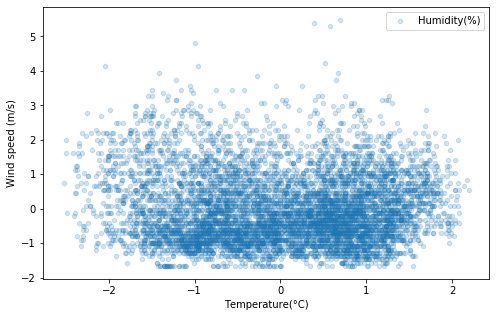

In [392]:
X_train.plot(kind="scatter", x="Temperature(°C)", y="Wind speed (m/s)",alpha=.2,label="Humidity(%)", figsize=(8,5))
plt.legend()
plt.show()

In [393]:
corr_matrix = bikes.corr()
corr_matrix["Rented Bike Count"].sort_values(ascending=False)

Rented Bike Count            1.000000
Temperature(°C)              0.562740
Hour                         0.425256
Dew point temperature(°C)    0.400263
Solar Radiation (MJ/m2)      0.273862
Visibility (10m)             0.212323
Wind speed (m/s)             0.125022
Rainfall(mm)                -0.128626
Snowfall (cm)               -0.151611
Humidity(%)                 -0.201973
Name: Rented Bike Count, dtype: float64

In [395]:
#as we have already seen, this data is really nice with no null/NaN values
(X_train.isnull().sum() + X_train.isna().sum()).sum()

0

In [399]:
#we now train on 6772 training examples
print(X_train.shape, X_test.shape)

(6772, 13) (1693, 13)


# Select and train a model 

### Linear Regression

In [400]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [408]:
from sklearn.metrics import mean_squared_error

train_preds = lin_reg.predict(X_train)
lin_mse = mean_squared_error(y_train, train_preds)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

438.9426248927495

In [410]:
#since the training labels std is 646, an error of 436 is pretty bad!
y_train.std()

646.2182138179219

In [418]:
lin_scores = cross_val_score(lin_reg, X_train, y_train,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [435.15762691 447.45165968 446.81395688 467.67590224 444.12406085
 419.01957316 424.54119127 464.86390276 425.49402785 424.67654078]
Mean: 439.98184423705777
Standard deviation: 16.281782249627472


Note that the linear regression mean on the training set is roughly the same as that on cross-validated set. That is, the linear regression model was underfitting on the training set.

### Decision Trees

In [411]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [413]:
train_preds = tree_reg.predict(X_train)
tree_mse = mean_squared_error(y_train, train_preds)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

The decision tree has definitely overfit the data. Let's cross-validate!

In [429]:
#cross_val_score(estimator, X, y, cv=...)
from sklearn.model_selection import cross_val_score

tree_reg = DecisionTreeRegressor(random_state=42)
scores = cross_val_score(tree_reg, X_train, y_train,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores) #note the negative sign

In [430]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [309.75317512 324.11997487 316.47130308 317.2882143  381.05372251
 270.32788505 333.7358188  299.21563637 328.7903392  332.45232219]
Mean: 321.32083914818446
Standard deviation: 26.780963113638805


So definitely, the decision tree was overfitting the training data. However, it is promising in the sense that its model capacity is higher than linear regression. A simple grid search tells us below tells us that a ``max_depth`` = 9 helps the model slightly

In [431]:
for i in range(1,20,2):
    tree_reg = DecisionTreeRegressor(random_state=1, max_depth=i)
    scores = cross_val_score(tree_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
    print(i,":",np.sqrt(-scores).mean())

1 : 552.9016255750093
3 : 387.8761111482367
5 : 335.1446458961083
7 : 298.4924180910591
9 : 286.655685016796
11 : 294.6107694942699
13 : 301.68730638244296
15 : 313.52689854518513
17 : 320.04501574453815
19 : 315.4511333930222


### Random Forests

In [438]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(verbose=1,n_estimators=100, random_state=42)
forest_reg.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.1s finished


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=1, warm_start=False)

In [439]:
train_preds = forest_reg.predict(X_train)
forest_mse = mean_squared_error(y_train, train_preds)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


87.03974023503923

In [440]:
forest_scores = cross_val_score(forest_reg, X_train, y_train,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

Scores: [225.29635088 231.10899527 237.34945411 227.22352637 252.84236731
 220.7067664  235.93347388 232.90442728 228.32654167 236.2190227 ]
Mean: 232.79109258604257
Standard deviation: 8.36918120234685


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Alright, random forests have better results than decision trees. However, it is still overfitting the training set, as the X_train MSE of 87<232 above. Regularization by snipping ``max_depth`` doesn't help, as seen below.

In [441]:
for i in range(1,20,2):
    forest_reg = RandomForestRegressor(random_state=1, max_depth=i)
    scores = cross_val_score(forest_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
    print(i,":",np.sqrt(-scores).mean())

1 : 545.4471319911739
3 : 373.70400298119415
5 : 305.6319673274248
7 : 263.5503252264461
9 : 243.91425618096156
11 : 236.42355219460623
13 : 234.3413649647924
15 : 233.68761516099994
17 : 233.525744162472
19 : 233.5901657580204


In [448]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)

# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [449]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [454]:
np.sqrt(-grid_search.best_score_)

232.97993124257533

In [450]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=8, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [458]:
feature_importances = grid_search.best_estimator_.feature_importances_
sorted(zip(feature_importances, X_train.columns), reverse=True)

[(0.31478781727596905, 'Hour'),
 (0.28190647098023736, 'Temperature(°C)'),
 (0.10923760475410968, 'Humidity(%)'),
 (0.07583788000142054, 'Solar Radiation (MJ/m2)'),
 (0.070526437966139, 'Winter'),
 (0.044174804512226856, 'Dew point temperature(°C)'),
 (0.03892659538819859, 'Rainfall(mm)'),
 (0.024719845941662322, 'Visibility (10m)'),
 (0.021975677669293394, 'Wind speed (m/s)'),
 (0.01109919269825894, 'Spring'),
 (0.003171280591954408, 'No Holiday'),
 (0.0029973169821414635, 'Summer'),
 (0.0006390752383884827, 'Snowfall (cm)')]

In [459]:
final_model = grid_search.best_estimator_
final_predictions = final_model.predict(X_test)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [460]:
final_rmse

231.9489638287368

We can compute a 95% confidence interval for the test RMSE:

In [461]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([212.68001396, 249.73557076])